#LOAN PREDICTION

In [1]:
import pandas as pd
print('Version of pandas:',pd.__version__)

Version of pandas: 1.1.5


In [2]:
data=pd.read_csv('loan_data.csv')
data.head(22)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
data.shape

(614, 13)

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})
data['Married']=data['Married'].map({'Yes':1,'No':0})
data['Dependents']=data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data['Property_Area']=data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [10]:
for i in data.columns[1:]:
    data[i]=(data[i].max()-data[i])/(data[i].max()-data[i].min())

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,1.0,1.000000,0.0,1.0,0.929511,1.000000,0.801140,0.25641,0.0,0.0,0.0
1,LP001003,1.0,0.0,0.666667,0.0,1.0,0.945170,0.963808,0.827786,0.25641,0.0,1.0,1.0
2,LP001005,1.0,0.0,1.000000,0.0,0.0,0.964750,1.000000,0.917511,0.25641,0.0,0.0,0.0
3,LP001006,1.0,0.0,1.000000,1.0,1.0,0.969907,0.943408,0.839363,0.25641,0.0,0.0,0.0
4,LP001008,1.0,1.0,1.000000,0.0,1.0,0.927644,1.000000,0.808973,0.25641,0.0,0.0,0.0


In [12]:
data.to_csv('loan_pred_data.csv',index=False)

Buiding Neural Networks using Keras

In [13]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [14]:
print('version of sklearn:',sklearn.__version__)

version of sklearn: 0.22.2.post1


In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,1.0,1.000000,0.0,1.0,0.929511,1.000000,0.801140,0.25641,0.0,0.0,0.0
1,LP001003,1.0,0.0,0.666667,0.0,1.0,0.945170,0.963808,0.827786,0.25641,0.0,1.0,1.0
2,LP001005,1.0,0.0,1.000000,0.0,0.0,0.964750,1.000000,0.917511,0.25641,0.0,0.0,0.0
3,LP001006,1.0,0.0,1.000000,1.0,1.0,0.969907,0.943408,0.839363,0.25641,0.0,0.0,0.0
4,LP001008,1.0,1.0,1.000000,0.0,1.0,0.927644,1.000000,0.808973,0.25641,0.0,0.0,0.0


In [16]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [18]:
data=data.drop('Loan_ID',axis=1)

In [19]:
data.shape

(614, 12)

In [20]:
x=data.drop('Loan_Status',axis=1)

In [21]:
y=data['Loan_Status']

In [22]:
x.shape,y.shape

((614, 11), (614,))

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [24]:
(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

Architechure of model in keras

In [25]:
import keras 
print('version of keras is:',keras.__version__)

version of keras is: 2.5.0


In [26]:
import tensorflow as tf

In [27]:
print('version:',tf.__version__)

version: 2.5.0


In [28]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense


In [29]:
x_train.shape

(491, 11)

In [30]:
x_train.shape[1]

11

In [31]:
input_neuron=x_train.shape[1]
output_neuron=1
hidden_layer=2
neuron_hidden_layer_1=10
neuron_hidden_layer_2=5


In [32]:
model=Sequential()
model.add(InputLayer(input_shape=(input_neuron,)))
model.add(Dense(units=neuron_hidden_layer_1,activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2,activation='relu'))
model.add(Dense(units=output_neuron,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:
model_history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
16/16 [==============================] - 14s 34ms/step - loss: 0.7404 - accuracy: 0.3267 - val_loss: 0.6954 - val_accuracy: 0.4065
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.4723 - val_loss: 0.6829 - val_accuracy: 0.6829
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6908 - val_loss: 0.6749 - val_accuracy: 0.7642
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.7140 - val_loss: 0.6652 - val_accuracy: 0.7561
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6665 - accuracy: 0.7423 - val_loss: 0.6529 - val_accuracy: 0.7480
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.7445 - val_loss: 0.6390 - val_accuracy: 0.7642
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.7669 - val_loss: 0.6242 - val_accuracy: 0.7886
Epoch 8/50
16/16 [

In [35]:
prediction=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
accuracy_score(y_test,prediction)

0.7886178861788617

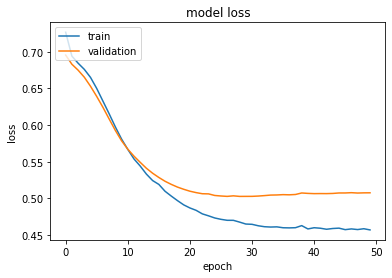

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

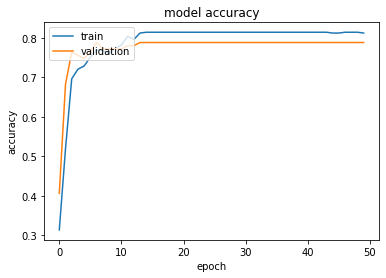

In [39]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()